In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv('./medical_examination.csv')
nf = pd.read_csv('./medical_examination.csv')

In [213]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [214]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# axes.plot()
def overweight(w,h):
    under = 0
    over = 1
    bmi = w / ((h / 100) ** 2)
    if bmi > 25:
        return 1
    else:
        return 0
    
conditions = [
    (df.weight / ((df.height / 100) ** 2)) > 25,
    (df.weight / ((df.height / 100) ** 2)) <= 25
]

choices = [1,0]
    
df['overweight'] = np.select(conditions, choices)
nf['overweight'] = nf.apply(lambda x: overweight(x['weight'], x['height']), axis=1)
nf

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [215]:
def normalize(norm):
    if norm > 1:
        return 1
    elif norm <= 1:
        return 0
gluc_norm = nf.apply(lambda x: normalize(x['gluc']), axis=1)
nf['gluc'] = gluc_norm
cholesterol_norm = nf.apply(lambda x: normalize(x['cholesterol']), axis=1)
nf['cholesterol'] = cholesterol_norm
df['gluc'] = gluc_norm
df['cholesterol'] = cholesterol_norm

In [217]:
df.head()
napa.sort_values(by=['variable'])

,cardio,variable,value
349997,1,active,0
349993,1,active,1
349992,1,active,1
349991,0,active,1
349990,1,active,1
...,...,...,...
140009,0,smoke,0
140010,0,smoke,0
140011,0,smoke,0
140005,0,smoke,0


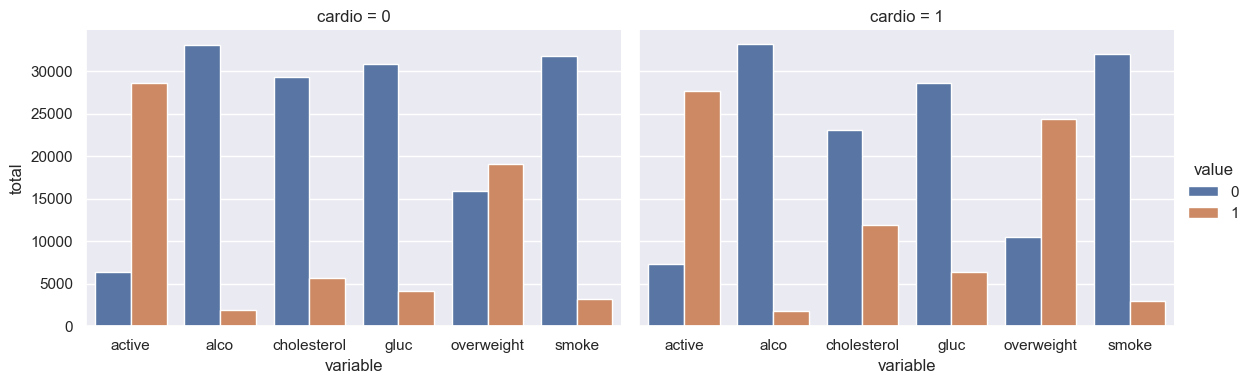

In [218]:
mask1 = df['cardio'] == 1
mask2 = df['cardio'] == 0
df_c1 = df[mask1]
df_c2 = df[mask2]
napa = df.drop(columns=['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo']).melt(id_vars=['cardio'])
df_c1 = df_c1.drop(columns=['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo']).melt(id_vars=['cardio'])
df_c2 = df_c2.drop(columns=['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo']).melt(id_vars=['cardio'])
teste = df_c1.groupby('variable').value_counts().reset_index()
napa = napa.sort_values(by=['variable'])
chart = sns.catplot(
    data=napa, x="variable", hue="value", col='cardio',
    kind="count", height=4, aspect=1.5,
).set(ylabel = 'total')


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.2 MB


In [242]:
pressure_filter = (df['ap_lo'] > df['ap_hi'])
height_less = (df['height'] >= df['height'].quantile(0.025))
height_more = (df['height'] > df['height'].quantile(0.975))
weight_less = (df['weight'] < df['weight'].quantile(0.025))
weight_more = (df['weight'] > df['weight'].quantile(0.975))
df_heatmap = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))
& (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
# df.drop(df[pressure_filter].index, inplace=True)
# df.drop(df[height_less].index, inplace=True)
# df.drop(df[height_more].index, inplace=True)
# df.drop(df[weight_less].index, inplace=True)
# df.drop(df[weight_more].index, inplace=True)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [243]:
# corr = sns.load_dataset("df").pivot("Score")
corr_matrix = df_heatmap.corr()
# Define mask used to cover squares above diagonal 
blank_filter = []
# for i in range(len(corr_matrix.columns)):
#     mask_i = []
#     for j in range(len(corr_matrix.columns)):
#         if i>j:
#             mask_i.append(True)
#         else: 
#             mask_i.append(False)
#     blank_filter.append(mask_i)

mask_ut=np.triu(np.ones(corr_matrix.shape)).astype(np.bool_)
mask_out = np.triu(np.ones(corr_matrix2.shape)).astype(np.bool_)
mask_heat = np.triu(corr_matrix)

<AxesSubplot:>

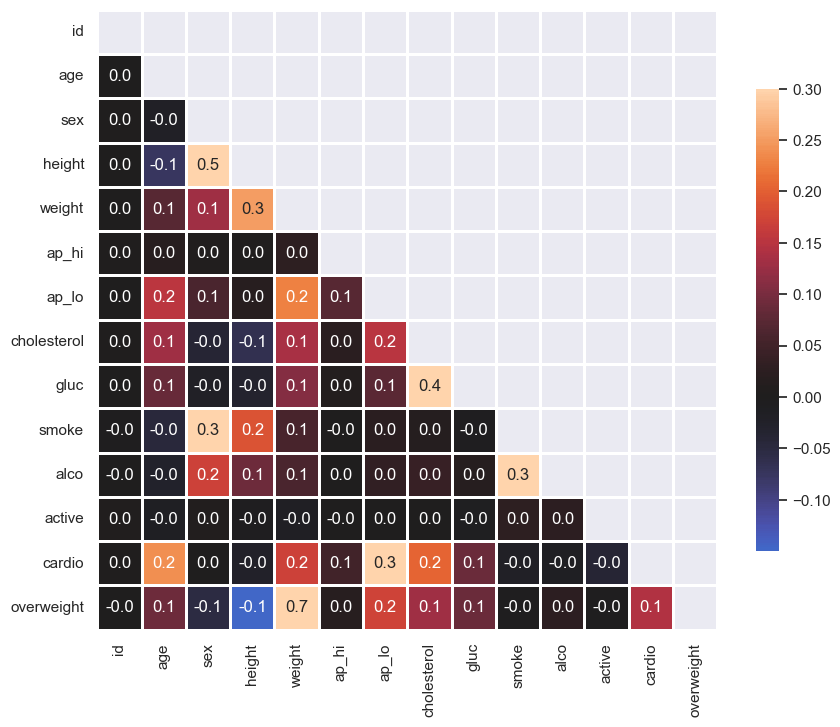

In [264]:
plt.figure(figsize=(10, 10))
sns.set(font_scale=1)
sns.heatmap(corr_matrix,
            linewidths=1,
            vmax=.3,
            center = 0,
            square=True,
            cbar_kws = {'shrink': 0.6},
            annot=True,
            fmt='.1f',
            mask=mask_heat)